In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
directory='/kaggle/input/sports-celebrity-images/CroppedDataset/'

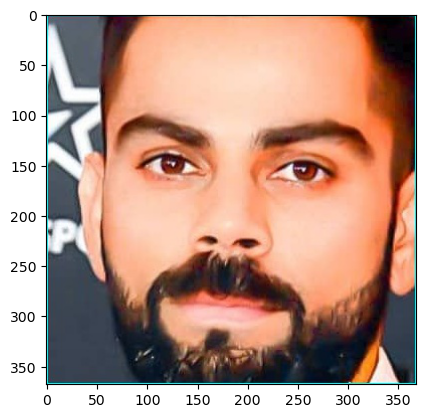

In [3]:
for folder in os.listdir(directory):
    folder_path = os.path.join(directory, folder)
    for pic in os.listdir(folder_path):
        photo=os.path.join(folder_path,pic)
        photo=plt.imread(photo)
        plt.imshow(photo)

In [4]:
classes={}
indexes={}
i=0
for folder in os.listdir(directory):
    classes[folder]=i
    indexes[i]=folder
    i+=1
classes

{'Serena': 0, 'Maria': 1, 'LionelMessi': 2, 'Federer': 3, 'Virat': 4}

In [5]:
X,y=[],[]
for folder in os.listdir(directory):
    folder_path = os.path.join(directory, folder)
    for pic in os.listdir(folder_path):
        photo=os.path.join(folder_path,pic)
        img=cv2.imread(photo)
        scaled_img = cv2.resize(img, (32, 32))
        combined_img = np.vstack((scaled_img.reshape(32*32*3,1)))
        X.append(combined_img)
        y.append(classes[folder])

In [6]:
len(X)

161

In [7]:
len(y)

161

In [8]:
len(X[0])

3072

In [9]:
X[0]

array([[ 44],
       [ 64],
       [ 87],
       ...,
       [131],
       [111],
       [ 86]], dtype=uint8)

In [10]:
X = np.array(X).reshape(len(X),len(X[0])).astype(float)
X.shape

(161, 3072)

In [11]:
X

array([[ 44.,  64.,  87., ..., 131., 111.,  86.],
       [185., 189.,  18., ...,  36.,  35.,   0.],
       [138., 147., 195., ...,  88., 131., 197.],
       ...,
       [235., 240.,  16., ...,  49.,  45.,   0.],
       [247., 250.,  19., ..., 182., 193.,  72.],
       [111., 102.,  90., ...,  71.,  57.,  55.]])

In [12]:
X[0]

array([ 44.,  64.,  87., ..., 131., 111.,  86.])

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)

SVC()

In [15]:
y_pred=model.predict(X_test)
y_pred

array([1, 3, 3, 3, 1, 3, 1, 3, 1, 4, 0, 3, 0, 2, 1, 3, 1, 1, 3, 0, 2, 0,
       0, 0, 1, 2, 3, 3, 1, 3, 4, 0, 3])

In [16]:
y_test=np.array(y_test)
y_test

array([3, 3, 4, 1, 2, 1, 3, 1, 3, 4, 0, 2, 0, 2, 1, 1, 3, 4, 3, 0, 2, 0,
       0, 0, 1, 4, 3, 1, 3, 3, 4, 2, 2])

In [17]:
model.score(X_test,y_test)

0.48484848484848486

Text(95.72222222222221, 0.5, 'Truth')

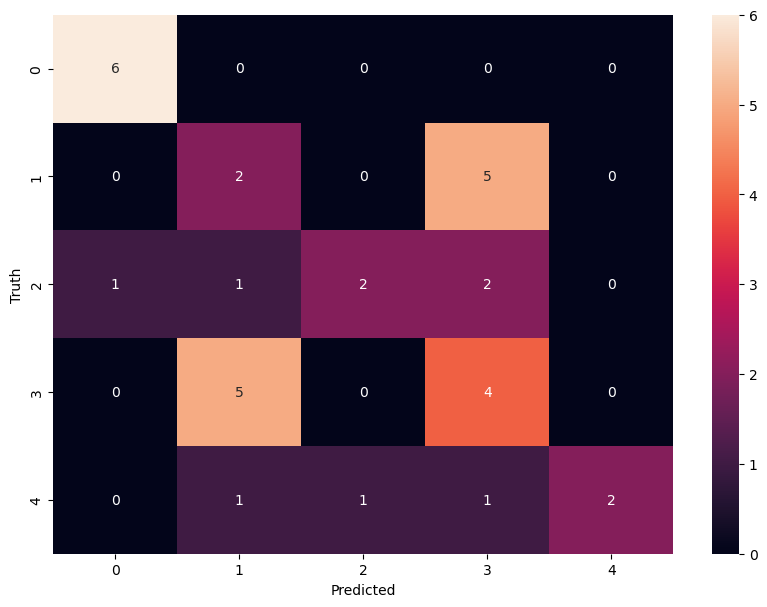

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model.predict(X_test))
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [20]:
y_pred=model.predict(X_test)
y_pred

array([1, 1, 3, 3, 2, 3, 1, 3, 1, 4, 1, 1, 0, 2, 1, 3, 1, 4, 3, 3, 2, 4,
       0, 1, 1, 2, 3, 3, 1, 3, 2, 2, 2])

In [21]:
y_test=np.array(y_test)
y_test

array([3, 3, 4, 1, 2, 1, 3, 1, 3, 4, 0, 2, 0, 2, 1, 1, 3, 4, 3, 0, 2, 0,
       0, 0, 1, 4, 3, 1, 3, 3, 4, 2, 2])

In [22]:
model.score(X_test,y_test)

0.42424242424242425

Text(95.72222222222221, 0.5, 'Truth')

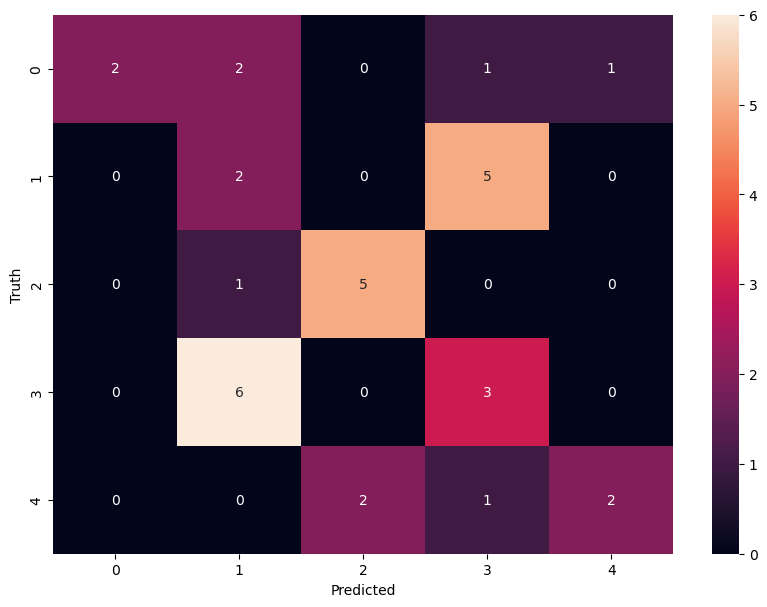

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model.predict(X_test))
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
y_pred=model.predict(X_test)
y_pred

array([1, 1, 4, 3, 2, 3, 1, 3, 1, 4, 1, 2, 0, 2, 1, 3, 1, 3, 3, 0, 2, 2,
       0, 1, 1, 4, 3, 3, 1, 3, 4, 2, 2])

In [26]:
y_test=np.array(y_test)
y_test

array([3, 3, 4, 1, 2, 1, 3, 1, 3, 4, 0, 2, 0, 2, 1, 1, 3, 4, 3, 0, 2, 0,
       0, 0, 1, 4, 3, 1, 3, 3, 4, 2, 2])

In [27]:
model.score(X_test,y_test)

0.5454545454545454

Text(95.72222222222221, 0.5, 'Truth')

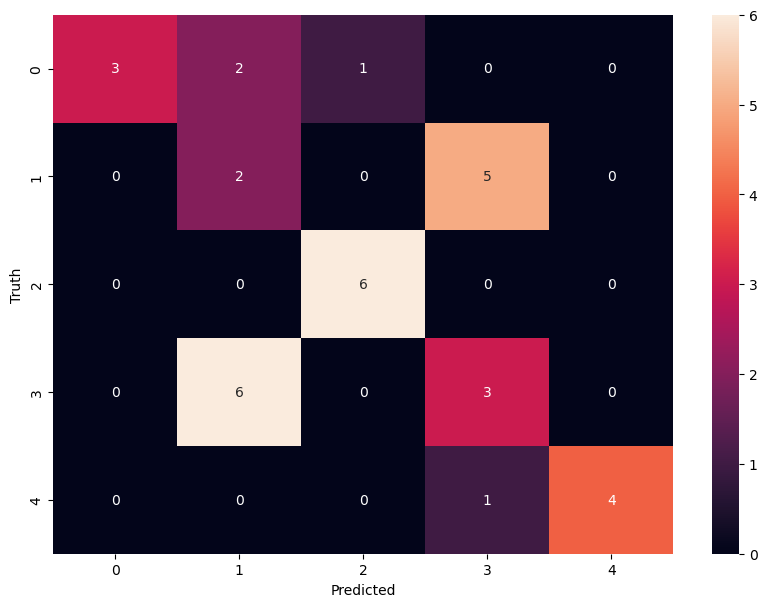

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model.predict(X_test))
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
import pickle

In [30]:
pickle.dump(model, open('/kaggle/working/model.pkl', 'wb'))

In [31]:
pickled_model = pickle.load(open('/kaggle/working/model.pkl', 'rb'))

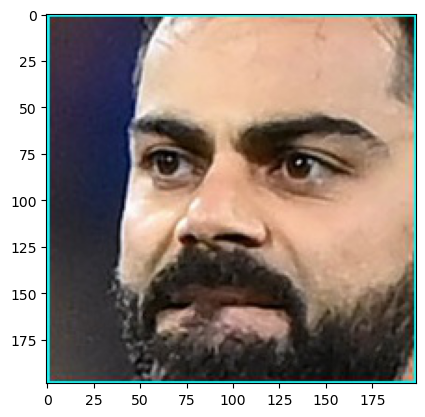

In [32]:
check=plt.imread('/kaggle/input/sports-celebrity-images/CroppedDataset/Virat/Virat12.jpg')
plt.imshow(check)

In [33]:
XX=[]
check=cv2.imread('/kaggle/input/sports-celebrity-images/CroppedDataset/Virat/Virat12.jpg')
scaled_check = cv2.resize(check, (32, 32))
combined_check = np.vstack((scaled_img.reshape(32*32*3,1)))
XX.append(combined_check)

In [34]:
XX = np.array(XX).reshape(len(XX),len(XX[0])).astype(float)
XX.shape

(1, 3072)

In [35]:
XX

array([[111., 102.,  90., ...,  71.,  57.,  55.]])

In [36]:
y_check=pickled_model.predict(XX)[0]
y_check

4

In [37]:
indexes

{0: 'Serena', 1: 'Maria', 2: 'LionelMessi', 3: 'Federer', 4: 'Virat'}

In [38]:
indexes[y_check]

'Virat'